<a href="https://colab.research.google.com/github/Amrutha-GR/AGR/blob/main/Neural_Network_For_Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pandas as pd


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

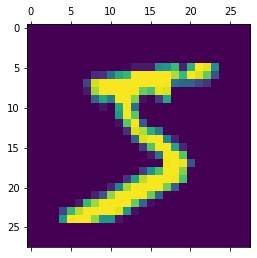

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
model = keras.Sequential([
                  keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4714 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2732 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9254


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2657 - accuracy: 0.9251


[0.26572754979133606, 0.9251000285148621]

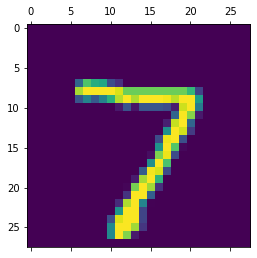

In [16]:
plt.matshow(X_test[0])

In [17]:
y_predict = model.predict(X_test_flattened)
y_predict[0]

array([2.9915869e-02, 4.5778174e-07, 6.2159359e-02, 9.6865666e-01,
       2.5911927e-03, 1.5834498e-01, 1.6434747e-06, 9.9976647e-01,
       1.0786867e-01, 7.6689005e-01], dtype=float32)

In [18]:
np.argmax(y_predict[0])

7

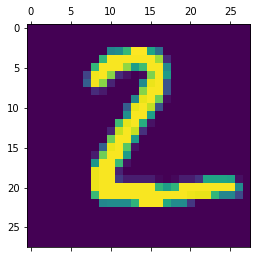

In [19]:
plt.matshow(X_test[1])

In [20]:
np.argmax(y_predict[1])

2

In [27]:
y_predict_label = [np.argmax(i) for i in y_predict]
y_predict_label[:5]

[7, 2, 1, 0, 4]

In [28]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Built a Confusion Matrix

In [31]:
CM = tf.math.confusion_matrix(labels= y_test, predictions= y_predict_label)
CM

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    5,    2,    1,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   6,    9,  929,   16,    7,    3,   12,   10,   35,    5],
       [   4,    0,   20,  923,    0,   21,    2,   10,   21,    9],
       [   2,    1,    4,    1,  904,    0,    9,    4,    9,   48],
       [   9,    3,    4,   38,   10,  772,   13,    6,   29,    8],
       [  11,    3,    6,    1,    7,   12,  913,    2,    3,    0],
       [   1,    8,   24,    8,    7,    0,    0,  934,    3,   43],
       [   8,   11,    7,   23,    9,   24,    9,   10,  861,   12],
       [  11,    8,    1,   10,   20,    5,    0,   13,    5,  936]],
      dtype=int32)>

Text(69.0, 0.5, 'truth')

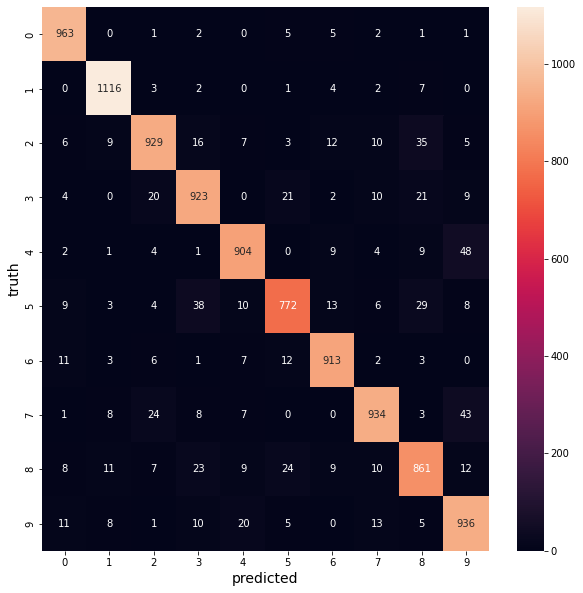

In [35]:
import seaborn as sn
plt.figure(figsize= (10,10))
sn.heatmap(CM, annot= True, fmt= 'd')
plt.xlabel("predicted", fontsize= 14)
plt.ylabel('truth', fontsize= 14)

In [36]:
model = keras.Sequential([
                  keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
                  keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2661 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1231 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0664 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9843


In [37]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0756 - accuracy: 0.9771


[0.07555150985717773, 0.9771000146865845]

In [39]:
y_predict_h1 = model.predict(X_test_flattened)
y_predict_label_h1 = [np.argmax(i) for i in y_predict_h1]
y_predict_label_h1[:5]

[7, 2, 1, 0, 4]

In [40]:
CM_h1 = tf.math.confusion_matrix(labels= y_test, predictions= y_predict_label_h1)
CM_h1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    2,    2,    1,    0,    0,    1,    4,    0],
       [   0, 1126,    1,    1,    0,    0,    2,    1,    4,    0],
       [   4,    4,  999,    4,    2,    0,    2,    8,    9,    0],
       [   0,    0,    2,  987,    0,    4,    0,    4,    5,    8],
       [   0,    0,    3,    0,  959,    1,    6,    0,    0,   13],
       [   3,    0,    0,   12,    0,  871,    2,    0,    2,    2],
       [   5,    3,    1,    1,    2,    5,  938,    1,    2,    0],
       [   1,    6,   11,    1,    1,    0,    0,  997,    1,   10],
       [   4,    0,    2,    4,    5,    8,    2,    2,  944,    3],
       [   3,    3,    0,    3,    9,    5,    0,    4,    2,  980]],
      dtype=int32)>

Text(69.0, 0.5, 'truth')

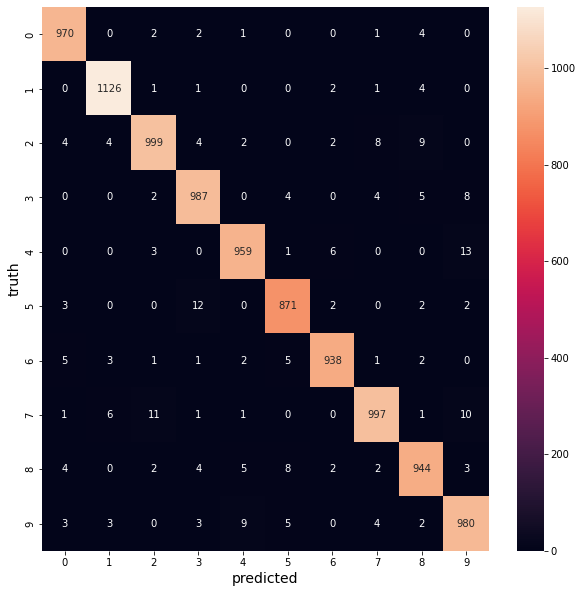

In [41]:
import seaborn as sn
plt.figure(figsize= (10,10))
sn.heatmap(CM_h1, annot= True, fmt= 'd')
plt.xlabel("predicted", fontsize= 14)
plt.ylabel('truth', fontsize= 14)

In [44]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(100, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2705 - accuracy: 0.9219
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1240 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0874 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0665 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0530 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0427 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0354 - accuracy: 0.9885
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0280 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0231 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

In [45]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9793


[0.07552555948495865, 0.9793000221252441]

In [46]:
y_predict_h1_f = model.predict(X_test)
y_predict_label_h1_f = [np.argmax(i) for i in y_predict_h1_f]
y_predict_label_h1_f[:5]

[7, 2, 1, 0, 4]

In [47]:
CM_h1_f = tf.math.confusion_matrix(labels= y_test, predictions= y_predict_label_h1_f)
CM_h1_f

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    1,    1,    0,    0,    1,    4,    1],
       [   0, 1120,    4,    1,    0,    1,    2,    2,    5,    0],
       [   4,    0, 1011,    5,    0,    0,    1,    2,    9,    0],
       [   0,    0,    5,  990,    0,    5,    0,    4,    3,    3],
       [   1,    0,    2,    0,  955,    1,    4,    2,    2,   15],
       [   3,    0,    0,    9,    1,  870,    3,    0,    3,    3],
       [   6,    1,    0,    1,    5,    8,  935,    0,    2,    0],
       [   1,    4,    8,    4,    1,    0,    0,  995,    4,   11],
       [   2,    0,    1,    2,    2,    5,    0,    1,  957,    4],
       [   1,    2,    0,    3,    5,    5,    0,    2,    2,  989]],
      dtype=int32)>

Text(69.0, 0.5, 'truth')

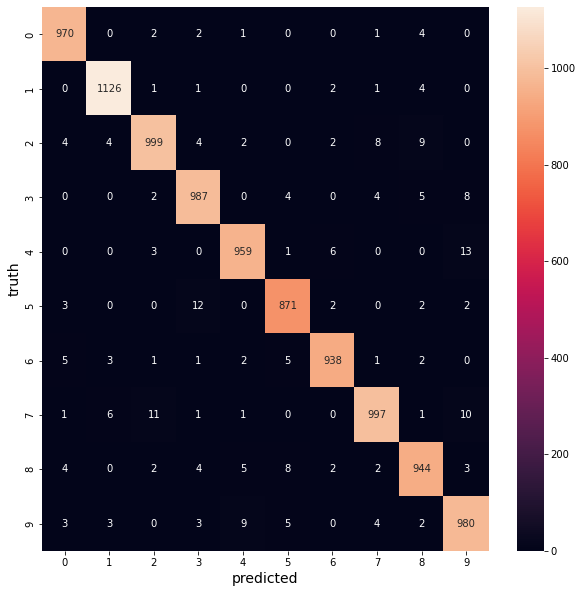

In [48]:
import seaborn as sn
plt.figure(figsize= (10,10))
sn.heatmap(CM_h1, annot= True, fmt= 'd')
plt.xlabel("predicted", fontsize= 14)
plt.ylabel('truth', fontsize= 14)